# Logistics Regression

Our first classification discussion.

Up to now, we were predicting a continuous variable using regression.

Now we will predict a probability (continous, in the domain \[0, 1\]) that is typically used for binary classification

## Binary classification and the logistics regression

### Setup

We are $(y_i, x_{i,1}, x_{i,2}, ..., x_{i,M})$ for $i=1,...,N$, where $y_i$ is the observed _dependent variable_ (we will have other names for this later), and $x_{i,j}$ is the observed set of _independent variables_ (or __features__).

We are assuming a binary classification here.  Specifically, $y$ can only be $1$ or $0$.

Typically, when $y=1$ we think of it as the outcome that we care the most about.

Very often, the condition that $y=1$ is the minority position.  Think of cases such as:
1. Will the applicant default on their loan?
2. Will the person be tested positive for COVID-19?
  
The $x_{i,j}$ represent the facts that we know about the observation:
* For the applicant applying for the loan
  * what is their income for the past 3 years
  * do they own a house or rent?
  * How many years were they employed by their current employer
* For the person being tested:
  * Has any member of their household been tested positive?
  * Have they traveled abroad recently?
  * What is their age?
  
__If given the $x$'s, can we predict $y$?__

## Predicting the probability that $y=1$

Often we want to predict $\operatorname{Pr}[y=1|x]$.  That is, given the set of independent variables $x$, what is the probability of a "successful" outcome?

\[We are dropping the $i$ (observation #) subscript in the below\]

Logistics regression often used to estimate $p=\operatorname{Pr}[y=1|x]$.  What it does is to use a $log$ transformation to fit a linear model:

$$ln \frac{p}{(1-p)}=\beta_0 + \beta_1 x_1 + ... \beta_m x_m$$
or
$$p=\frac{1}{1+e^{\beta_0 + \beta_1 x_1 + ... \beta_m x_m}}$$


## Estimating the $\beta$'s

Given a dataset of $N$ observations, the estimation of the $\beta$'s is usually done by optimizing the _log-likelihood_ and using a _gradient descent_ optimization approach.

While not absolutely necessary to fully comprehend, it's good to sometimes peek a little under the covers to understand how the parameters $\beta$'s are estimated.

Suppose we have $n$ training observations $(y_1, x_{1,1}, x_{1,2}, ..., x_{1,m}), (y_2, x_{2,1}, x_{2,2}, ..., x_{2,m})$ $\dots$ $(y_n, x_{n,1}, x_{n,2}, ..., x_{n,m})$

Remember, the $y_i$ are either $0$ or $1$.  Let observations be ordered so that the first $k$ observations all have $y_i=1, i=1,\dots,k$ and the last $n-k$ observations are when $y_i=0, i=k+1,\dots,n$

The probability that we will actually observe those $y$'s, given the inputs $x$'s, is

$$L(\beta_0, \beta_1,\dots,\beta_m) = \prod_{i=1}^{k}\frac{1}{1+e^{\beta_0 + \beta_1 x_{i,1} + ... \beta_m x_{i,m}}}\prod_{i=k+1}^{n}\frac{e^{\beta_0 + \beta_1 x_{i,1} + ... \beta_m x_{i,m}}}{1+e^{\beta_0 + \beta_1 x_{i,1} + ... \beta_m x_{i,m}}}$$

Logistics regression then finds the $\beta_0, \beta_1,\dots,\beta_m$ that maximizes (the log of) $L(\beta_0, \beta_1,\dots,\beta_m)$.

This is called **maximum likelihood estimation**.

In scikit-learn, they also add a 'regularization' term.  There is a choice of $\frac{1}{C}\sum_{j=1}^{m}\beta_j^2$ or
$\frac{1}{C}\sum_{j=1}^{m}|\beta_j|$

or both!  When it is both, it is called **ElasticNet**.

Synthetic example.

Let $\tilde{X} = \epsilon_1,\dots,\epsilon_n$ be instances of a (normal/gaussian/bell shaped curve) $N(0,1)$.  That's with mean $0$ and standard deviation of $1$.

Let $y_i = \begin{cases}1 & \tilde{X}_i > 0 \\ 
0 & \tilde{X}_i \le 0 \end{cases}$

Let $X_i = \begin{cases}\tilde{X_i} \times 4 + 0.3 \times N(0,1) & \tilde{X}_i > 0 \\ 
\tilde{X_i} + 0.3 \times N(0,1) & \tilde{X}_i \le 0 \end{cases}$




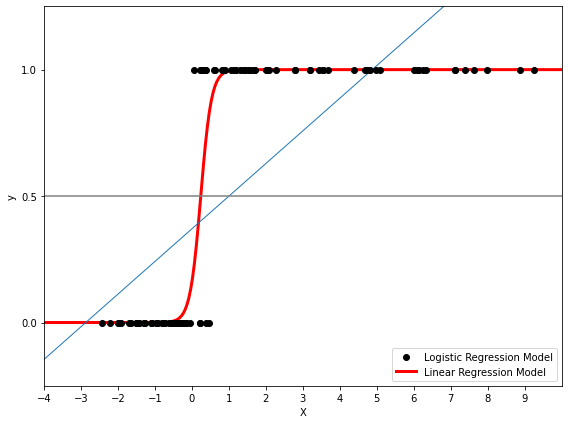

In [1]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
# print('X: ', X)
y = (X > 0).astype(float)
X[X > 0] *= 4
# print('X: ', X)
X += .3 * np.random.normal(size=n_samples)
# print('X: ', X)

X = X[:, np.newaxis]
# print('X: ', X)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()  # clear current figure.  How nothing to do with the classifier call clf above!!
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

# expit(x) = 1 / ( 1 + exp(-x))
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='medium')
plt.tight_layout()
plt.show()

In [2]:
from sklearn import datasets
import pandas as pd

# import some data to play with
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["iris_type"] = iris.target_names[iris.target]
iris_df["iris_target"] = iris.target
print(f'\nIris types: {iris.target_names}\n')
iris_df.head(75)


Iris types: ['setosa' 'versicolor' 'virginica']



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type,iris_target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,versicolor,1
71,6.1,2.8,4.0,1.3,versicolor,1
72,6.3,2.5,4.9,1.5,versicolor,1
73,6.1,2.8,4.7,1.2,versicolor,1


# Extending Logistic Regression past Binary Classification

In the math that we showed, logistic regression is predicting $\operatorname{Pr}[Y=1]$ assuming the only choices were $Y=1$ or $Y=0$.

In the Iris data, there are 3 choices.

Logistic regression can be extended to the 'multinomial' case, and that is done automatically in scikit-learn.

There are other ways of extending binary classification models to multi-class cases.  A popular way, called one-versus-rest (OVR), is also available for logistic regression in scikit-learn.  We will devote later more time to discuss this.

# Plotting regions

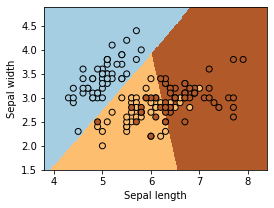

In [3]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = linear_model.LogisticRegression(C=1e5)  

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(xy)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

# Really wanted to use all four attributes of the Iris

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

log_reg = linear_model.LogisticRegression(C=1e5, max_iter=1000)  
X = iris.data
y = np.array(iris.target_names[iris.target])

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(log_reg, X, y, cv=10)    # LeaveOneOut())
conf_mat = confusion_matrix(y, y_pred, labels=iris.target_names)

print(f'                ', end='')
for name in iris.target_names:
    print(f"{'Pred-' + name:>16}", end='')
print()
for i in range(len(iris.target_names)):
    print(f'{"Act-" + iris.target_names[i]:16}', end='')
    for j in range(len(iris.target_names)):
          print(f'{conf_mat[i, j]:>16}', end='')
    print()


                     Pred-setosa Pred-versicolor  Pred-virginica
Act-setosa                    50               0               0
Act-versicolor                 0              48               2
Act-virginica                  0               1              49
